In [1]:
import sys
sys.path.insert(0, '..')
from helpers.timing import timed, compare

import numpy as np
import random
from matplotlib import pyplot as plt

# Сортировка подсчётом - сортировка, не основанная на сравнении

Сортировка подсчётом — алгоритм сортировки, в котором используется диапазон чисел сортируемого массива (списка) для подсчёта совпадающих элементов. Применение сортировки подсчётом целесообразно лишь тогда, когда сортируемые числа имеют (или их можно отобразить в) диапазон возможных значений, который достаточно мал по сравнению с сортируемым множеством, например, миллион натуральных чисел меньших 1000.

## Задача
Первая строка содержит число $1 \le n \le 10^4$, вторая — $n$ натуральных чисел, не превышающих 10. Выведите упорядоченную по неубыванию последовательность этих чисел.

In [2]:
def get_countsort_array(ar):
    lenght = max(ar) + 1
    counters = [0] * lenght
    for a in ar:
        counters[a] += 1
    ar_new = []
    for number in range(lenght):
        ar_new += [number] * counters[number] 
    return ar_new

## Тестирование

In [3]:
A = [1, 2, 3, 5, 4, 5, 6, 6, 5, 9, 5, 56, 0, 482, 265, 264,
     413, 35, 55, 454, 5, 454, 5, 2, 2, 55, 6, 2, 2, 5, 4]
print(get_countsort_array(A))

[0, 1, 2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 9, 35, 55, 55, 56, 264, 265, 413, 454, 454, 482]


In [4]:
def test(low=0,  high=1000, size=1000, n_iters=1000):
    for i in range(n_iters):
        random_size = np.random.randint(1, size)
        ar = np.random.randint(low, high, random_size).tolist()
        countsort_ar = get_countsort_array(ar)
        sort_ar = ar.copy()
        sort_ar.sort()
        assert countsort_ar == sort_ar

In [5]:
try:
    test()
    print('Проверка прошла успешно!')    
except:
    print('Всё пропало, шеф!')

Проверка прошла успешно!


## Производительность

Создадим функцию для быстрой сортировки. Если бы мы взяли quicksort из `numpy.sort`, который стоит в этой функции по умолчанию, то получили больше быстродействия, так как в `numpy` используется Си-шный код. В качестве сравнения возьмем обе быстрые сортировки:
- на чистом Python
- из `numpy`

и сравним со сортировкой подсчетом.

In [6]:
def get_quicksort_array(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n < q:
               s_nums.append(n)
           elif n > q:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return get_quicksort_array(s_nums) + e_nums + get_quicksort_array(m_nums)

Попробуем сравнить быстродействие быстрой сортировки и сортировки подсчетом в двух экспериментах:
- с массивом, состоящим из чисел от 1 до 10
- с массивом, состоящим из чисел от 1 до 100000

Эксперимент проводится так:
- создаем массив `array_for_sort` длины `max_size` с целочисленными значениями от `low` до `high`
- создаем массив, в котором будут срезы `array_for_sort`
- сравниваем быстродействие алгоритмов

In [7]:
def compare_wrapper(low, high, max_size):
    array_for_sort = np.random.randint(low, high, max_size)
    arrays_list_for_sort = []
    for size in range(1, max_size):
            arrays_list_for_sort.append(array_for_sort[:size])
    compare((get_countsort_array, get_quicksort_array, np.sort), arrays_list_for_sort, unpack_array=False)

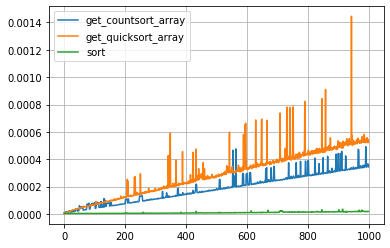

In [8]:
compare_wrapper(low=1, high=10, max_size=1000)

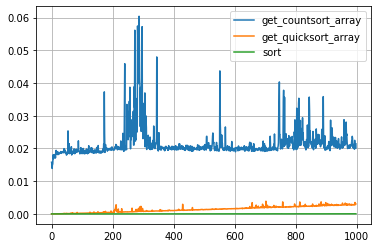

In [9]:
compare_wrapper(low=1, high=100000, max_size=1000)

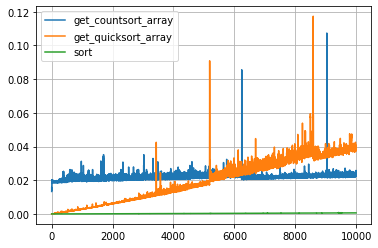

In [10]:
compare_wrapper(low=1, high=100000, max_size=10000)

## Выводы
- Быстрая сортировка работает медленее, чем сортировка подсчетом при маленьких порядках чисел в неотсортированном массиве.
- Быстрая сортировка работает быстрее, чем сортировка подсчетом при больших порядках чисел в неотсортированном массиве. Но есть один нюанс: чем больше размерность неотсортированного массива, тем разница во времени становится меньше и сортировка подсчетом может обогнать быструю сортировку при довольно большой размерности массива.
- Быстрая сортировка из `numpy` всех уделывает из-за работы внутри с Си-шным кодом. Так что в большинстве случаев можно считать её серебрянной пулей.

Но, увы, сортировка подсчетом работает только с целочисленными значениями.